<a href="https://colab.research.google.com/github/BagusRezky/PCVK_Ganjil_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from google.colab.patches import cv2_imshow

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Latihan

In [4]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

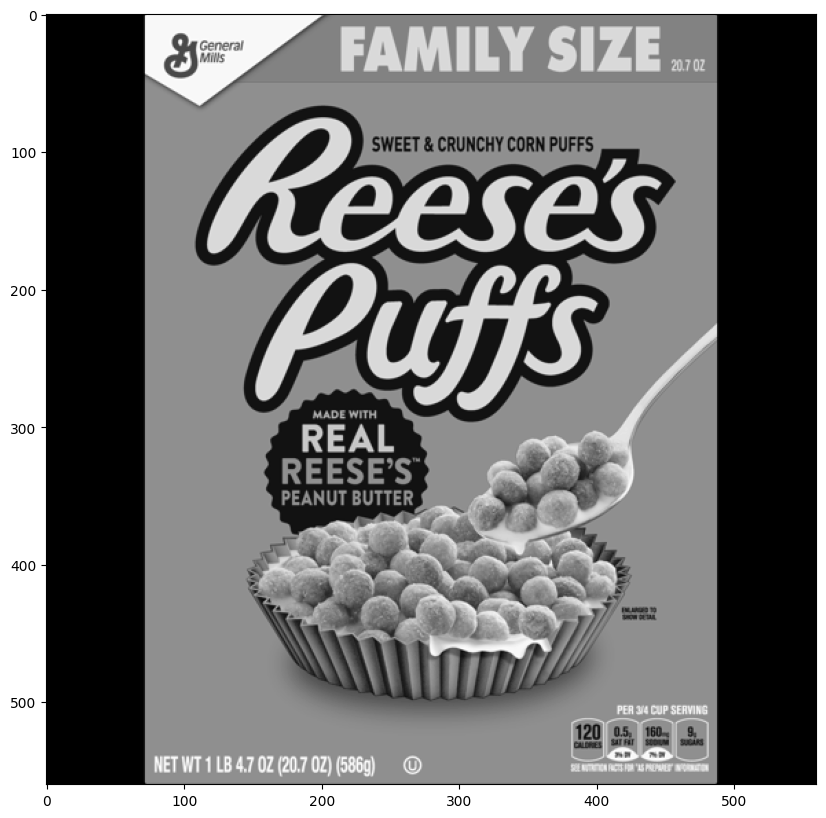

In [5]:
reeses = cv2.imread('/content/drive/MyDrive/Colab/facedet/reeses_puffs.png',0)
display(reeses)

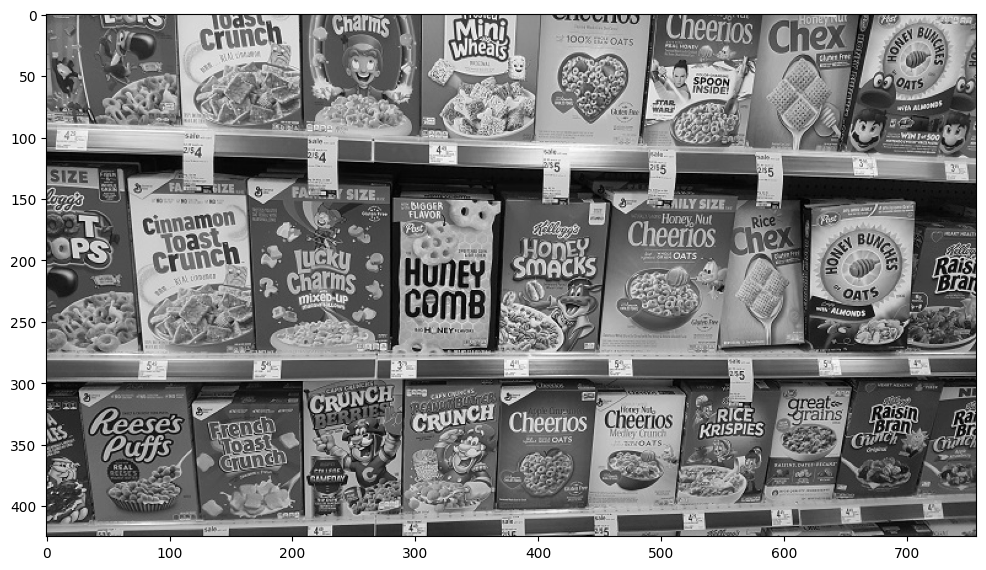

In [6]:
cereals = cv2.imread('/content/drive/MyDrive/Colab/facedet/many_cereals.jpg',0)
display(cereals)

In [7]:
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck = True)

matches = bf.match(des1,des2)

single_match = matches[0]
# print("Jarak:", single_match.distance)
single_match.distance

71.0

In [8]:
len(matches)

139

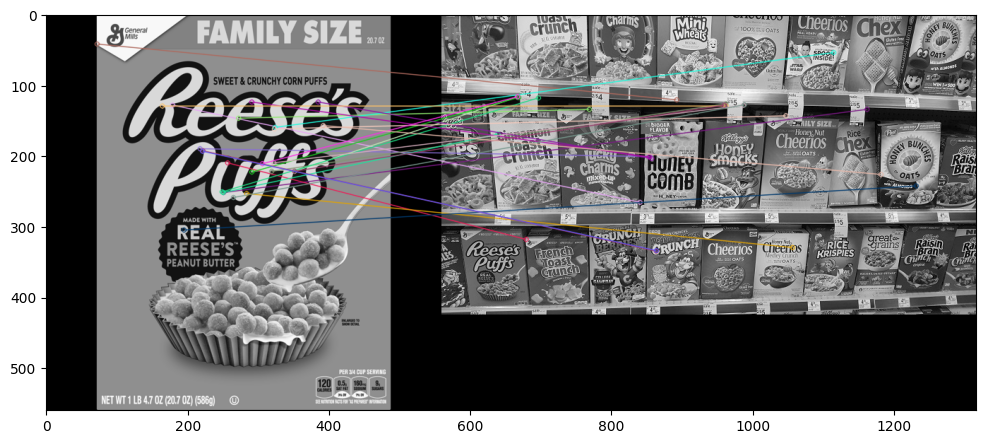

In [9]:
matches = sorted(matches, key = lambda x:x.distance)
reeses_match = cv2.drawMatches(reeses, kp1, cereals, kp2, matches[:25],None, flags=2)
display(reeses_match)

## Pencocokan lebih akurat

In [10]:
!pip install opencv-contrib-python==4.8.0.74

In [11]:
sift = cv2.xfeatures2d.SIFT_create()

kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []

# Makin kecil jarak makin cocok
# rasio match1 < 75% match2
for match1,match2 in matches:
  # jika jarak match1 lebih kecil dari jarak 75% match2
  # descriptor disimpan
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

79

In [12]:
len(matches)

1501

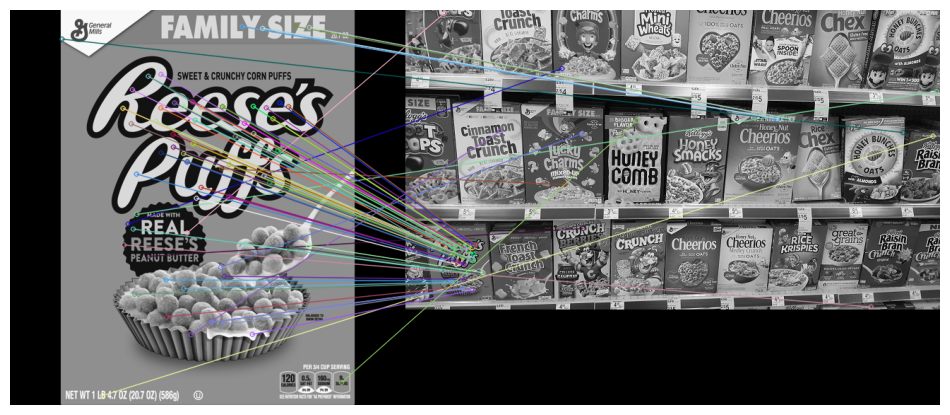

In [13]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

# display gambar
plt.figure(figsize=(12, 6))
plt.imshow(sift_matches)
plt.axis('off')
plt.show()

## konsep face detection

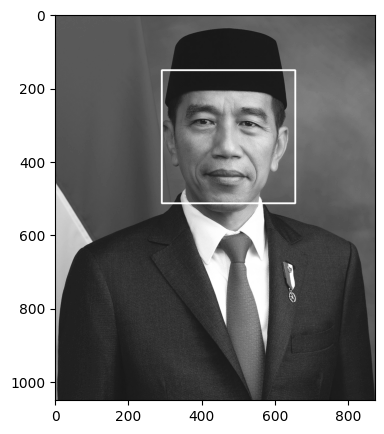

In [15]:
cascade_wajah = cv2.CascadeClassifier('/content/drive/MyDrive/Colab/haarcascades/haarcascade_frontalface_alt.xml')
jokowi = cv2.imread('/content/drive/MyDrive/Colab/facedet/jokowi.jpg',0)

roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
 cv2.rectangle(jokowi,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (5,5))
plt.imshow(jokowi, cmap='gray')

## Tugas Praktikum

In [19]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

<Figure size 1000x1000 with 0 Axes>

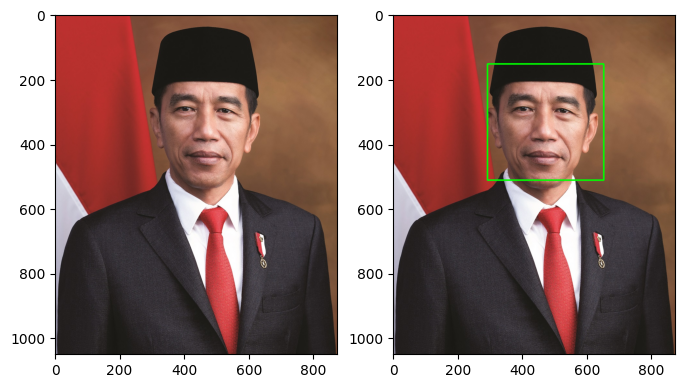

<Figure size 1000x1000 with 0 Axes>

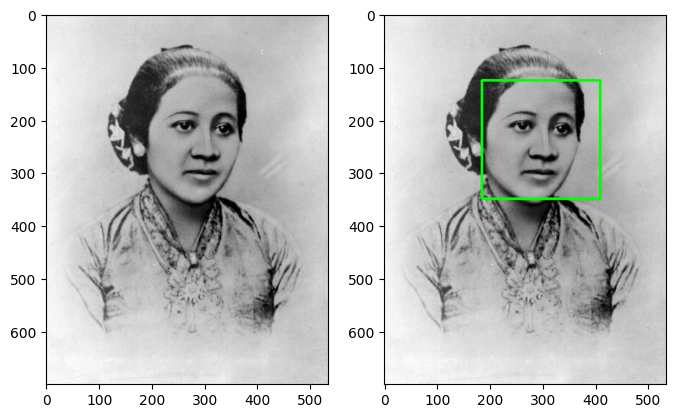

<Figure size 1000x1000 with 0 Axes>

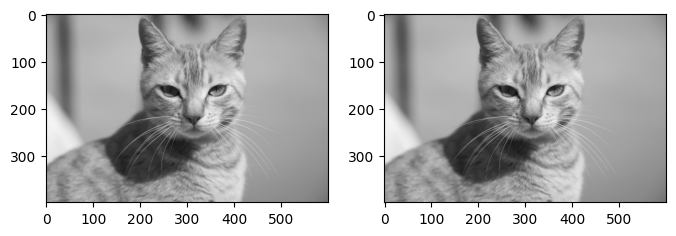

<Figure size 1000x1000 with 0 Axes>

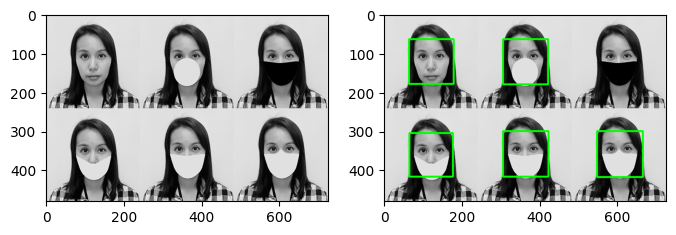

<Figure size 1000x1000 with 0 Axes>

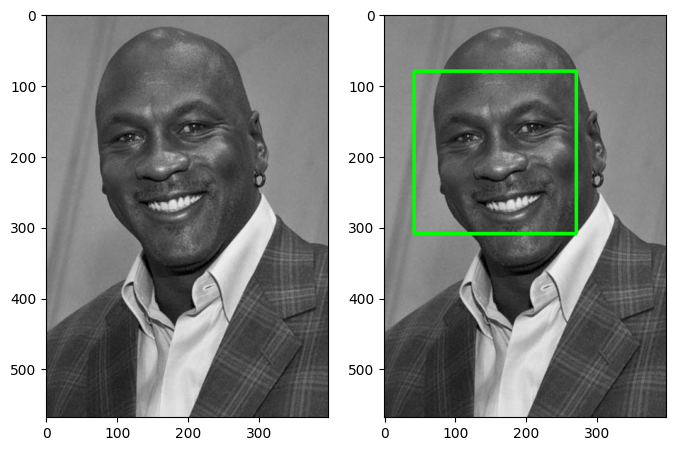

<Figure size 1000x1000 with 0 Axes>

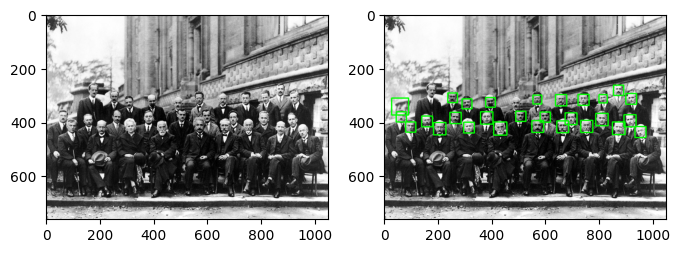

In [20]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Colab/haarcascades/haarcascade_frontalface_alt.xml')

jokowi = cv.imread('/content/drive/MyDrive/Colab/facedet/jokowi.jpg')
jokowi_rgb = cv.cvtColor(jokowi, cv.COLOR_BGR2RGB)
jokowi_fd = jokowi_rgb.copy()

kartini = cv.imread('/content/drive/MyDrive/Colab/facedet/kartini.jpg',0)
kartini_rgb = cv.cvtColor(kartini, cv.COLOR_BGR2RGB)
kartini_fd = kartini_rgb.copy()

kucing = cv.imread('/content/drive/MyDrive/Colab/facedet/mycat.jpg',0)
kucing_rgb = cv.cvtColor(kucing, cv.COLOR_BGR2RGB)
kucing_fd = kucing_rgb.copy()

mask = cv.imread('/content/drive/MyDrive/Colab/facedet/mask.png',0)
mask_rgb = cv.cvtColor(mask, cv.COLOR_BGR2RGB)
mask_fd = mask_rgb.copy()

mjordan = cv.imread('/content/drive/MyDrive/Colab/facedet/mjordan.jpg',0)
mjordan_rgb = cv.cvtColor(mjordan, cv.COLOR_BGR2RGB)
mjordan_fd = mjordan_rgb.copy()

solvayconf = cv.imread('/content/drive/MyDrive/Colab/facedet/solvayconf.jpg',0)
solvayconf_rgb = cv.cvtColor(solvayconf, cv.COLOR_BGR2RGB)
solvayconf_fd = solvayconf_rgb.copy()

fd_jokowi = cascade_wajah.detectMultiScale(jokowi_fd)
for(x,y,w,h) in fd_jokowi:
  cv.rectangle(jokowi_fd, (x,y),(x+w,y+h), (0,255,0), 3)
plt.figure(figsize = (10,10))
f, axarr = plt. subplots(1,2,figsize=(8,8))
plt.subplot(121),plt.imshow(jokowi_rgb)
plt.subplot(122),plt.imshow(jokowi_fd)
plt.show()

fd_kartini = cascade_wajah.detectMultiScale(kartini_fd)
for(x,y,w,h) in fd_kartini:
  cv.rectangle(kartini_fd, (x,y),(x+w,y+h), (0,255,0), 3)
plt.figure(figsize = (10,10))
f, axarr = plt. subplots(1,2,figsize=(8,8))
plt.subplot(121),plt.imshow(kartini_rgb,cmap='gray')
plt.subplot(122),plt.imshow(kartini_fd,cmap='gray')
plt.show()

fd_kucing = cascade_wajah.detectMultiScale(kucing_fd)
for(x,y,w,h) in fd_kucing:
  cv.rectangle(kucing_fd, (x,y),(x+w,y+h), (0,255,0), 3)
plt.figure(figsize = (10,10))
f, axarr = plt. subplots(1,2,figsize=(8,8))
plt.subplot(121),plt.imshow(kucing_rgb,cmap='gray')
plt.subplot(122),plt.imshow(kucing_fd,cmap='gray')
plt.show()

fd_mask = cascade_wajah.detectMultiScale(mask_fd)
for(x,y,w,h) in fd_mask:
  cv.rectangle(mask_fd, (x,y),(x+w,y+h), (0,255,0), 3)
plt.figure(figsize = (10,10))
f, axarr = plt. subplots(1,2,figsize=(8,8))
plt.subplot(121),plt.imshow(mask_rgb,cmap='gray')
plt.subplot(122),plt.imshow(mask_fd,cmap='gray')
plt.show()

fd_mjordan = cascade_wajah.detectMultiScale(mjordan_fd)
for(x,y,w,h) in fd_mjordan:
  cv.rectangle(mjordan_fd, (x,y),(x+w,y+h), (0,255,0), 3)
plt.figure(figsize = (10,10))
f, axarr = plt. subplots(1,2,figsize=(8,8))
plt.subplot(121),plt.imshow(mjordan_rgb,cmap='gray')
plt.subplot(122),plt.imshow(mjordan_fd,cmap='gray')
plt.show()

fd_solvayconf = cascade_wajah.detectMultiScale(solvayconf_fd)
for(x,y,w,h) in fd_solvayconf:
  cv.rectangle(solvayconf_fd, (x,y),(x+w,y+h), (0,255,0), 3)
plt.figure(figsize = (10,10))
f, axarr = plt. subplots(1,2,figsize=(8,8))
plt.subplot(121),plt.imshow(solvayconf_rgb,cmap='gray')
plt.subplot(122),plt.imshow(solvayconf_fd,cmap='gray')
plt.show()

<Figure size 1000x1000 with 0 Axes>

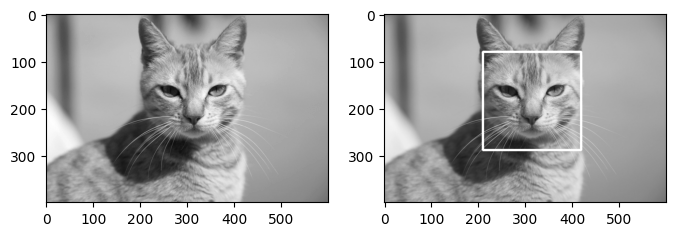

In [22]:
cascade_kucing = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalcatface.xml')

mycat = cv.imread('/content/drive/MyDrive/Colab/facedet/mycat.jpg', 0)

mycat1 = cv.cvtColor(mycat, cv.COLOR_GRAY2RGB)

roi_wajah = cascade_kucing.detectMultiScale(mycat)

for(x, y, w, h) in roi_wajah:
  cv.rectangle(mycat1, (x, y), (x+w, y+h), (255, 255, 255), 3)

plt.figure(figsize = (10, 10))
f, axarr = plt.subplots(1, 2, figsize = (8, 8))
plt.subplot(121), plt.imshow(mycat, cmap = 'gray')
plt.subplot(122), plt.imshow(mycat1)
plt.show()

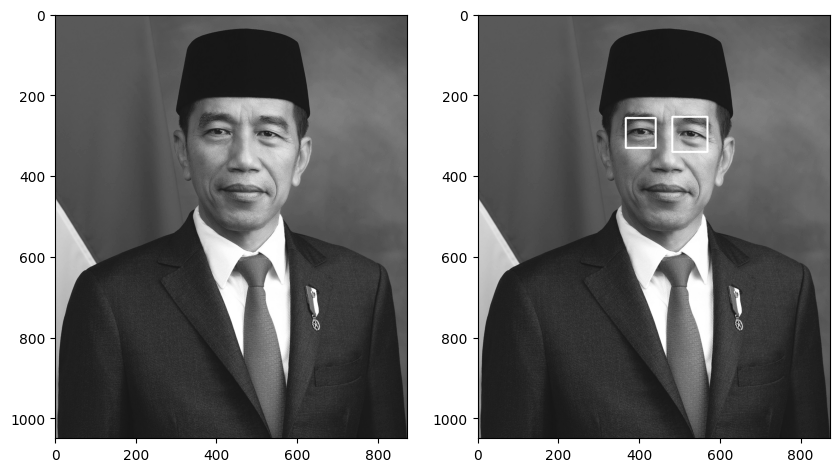

In [23]:
cascade_wajah = cv.CascadeClassifier('/content/drive/MyDrive/Colab/haarcascades/haarcascade_eye.xml')

jokowi = cv.imread('/content/drive/MyDrive/Colab/facedet/jokowi.jpg')
jokowi_ori = cv.imread('/content/drive/MyDrive/Colab/facedet/jokowi.jpg')
jokowi_gray = cv.cvtColor(jokowi, cv.COLOR_BGR2GRAY)
jokowi_ori_gray = cv.cvtColor(jokowi_ori, cv.COLOR_BGR2GRAY)

roi_wajah = cascade_wajah.detectMultiScale(jokowi_gray)
for (x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi_gray,(x,y),(x+w,y+h),(255,255,255),3)

# Plot outputs
f, axarr = plt. subplots(1,2,figsize=(10,10))
plt.subplot(121),plt.imshow(jokowi_ori_gray, cmap='gray')
plt.subplot(122),plt.imshow(jokowi_gray, cmap='gray')
plt.show()
